In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [3]:
train = pd.read_csv("logistic_dataset/titanic_train.csv")

train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

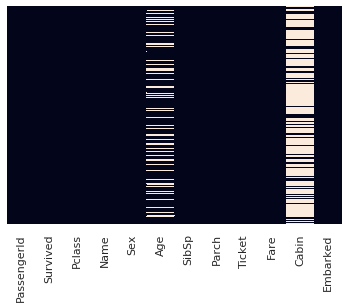

In [5]:
sns.heatmap(train.isnull(), cbar = False, yticklabels=False)

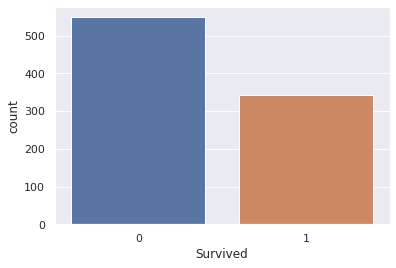

In [6]:
sns.countplot(x='Survived',data=train)

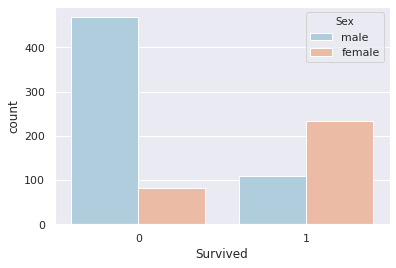

In [11]:
sns.countplot(x='Survived', hue='Sex',data=train,palette='RdBu_r')

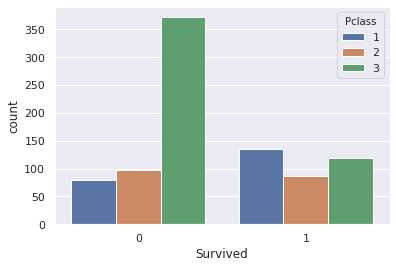

In [13]:
sns.countplot(x='Survived', hue='Pclass',data=train)

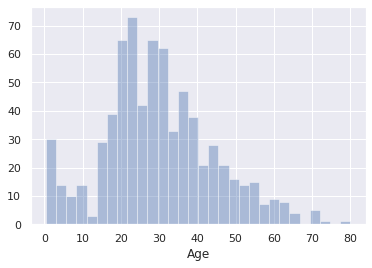

In [18]:
sns.distplot(train['Age'].dropna(), bins=30 , kde=False)

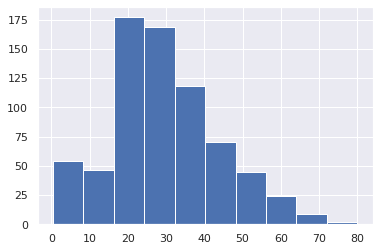

In [20]:
train['Age'].hist()

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


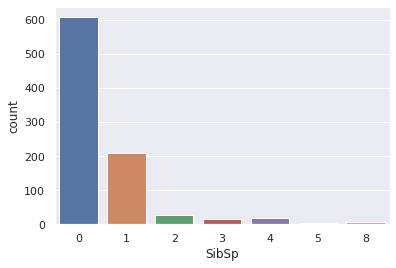

In [22]:
sns.countplot(x='SibSp',data=train)

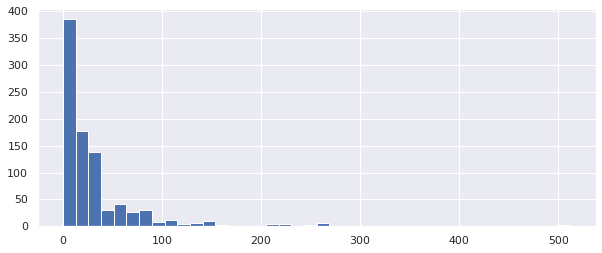

In [25]:
train['Fare'].hist(bins=40, figsize=(10,4))

In [6]:
import cufflinks as cf

cf.go_offline()

In [7]:
train['Age'].iplot(kind='hist')

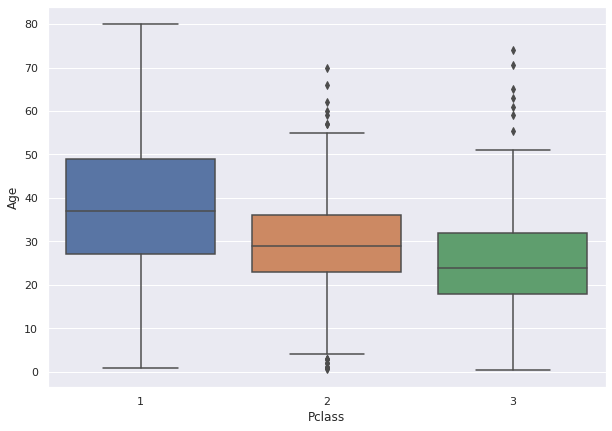

In [10]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [16]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [17]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

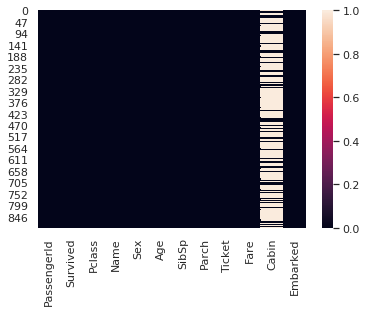

In [18]:
sns.heatmap(train.isnull())

In [19]:
train.drop('Cabin', inplace=True, axis=1)

In [20]:
train.dropna(inplace=True)

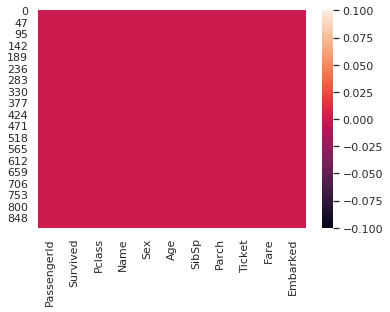

In [21]:
sns.heatmap(train.isnull())

In [25]:
pd.get_dummies(train['Sex'] , drop_first=True)

male
0       1
1       0
2       0
3       0
4       1
..    ...
886     1
887     0
888     0
889     1
890     1

[889 rows x 1 columns]

In [26]:
sex = pd.get_dummies(train['Sex'] , drop_first=True)

In [27]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [29]:
train = pd.concat([train, sex, embark],axis=1)

In [30]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  24.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  37.0      1   
2                             Heikkinen, Miss. Laina  female  24.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  37.0      1   
4                           Allen, Mr. William Henry    male  24.0      0   

   Parch            Ticket     Fare Embarked  male  Q  S  
0      0         A/5 21171   7.2500        S     1  0  1  
1      0          PC 17599  71.2833        C     0  0  0  
2      0  STON/O2. 3101282   7.9250        S     0  0  1  
3      0            113803  53.1000        S     0  0  1  
4      0            373450   8.0500        S     1  0  1

In [32]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [33]:
train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  24.0      1      0   7.2500     1  0  1
1            2         1       1  37.0      1      0  71.2833     0  0  0
2            3         1       3  24.0      0      0   7.9250     0  0  1
3            4         1       1  37.0      1      0  53.1000     0  0  1
4            5         0       3  24.0      0      0   8.0500     1  0  1

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   male         889 non-null    uint8  
 8   Q            889 non-null    uint8  
 9   S            889 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 98.2 KB


In [36]:
train.drop('PassengerId',axis=1,inplace=True)

In [37]:
train

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0           0       3  24.0      1      0   7.2500     1  0  1
1           1       1  37.0      1      0  71.2833     0  0  0
2           1       3  24.0      0      0   7.9250     0  0  1
3           1       1  37.0      1      0  53.1000     0  0  1
4           0       3  24.0      0      0   8.0500     1  0  1
..        ...     ...   ...    ...    ...      ...   ... .. ..
886         0       2  29.0      0      0  13.0000     1  0  1
887         1       1  37.0      0      0  30.0000     0  0  1
888         0       3  24.0      1      2  23.4500     0  0  1
889         1       1  37.0      0      0  30.0000     1  0  0
890         0       3  24.0      0      0   7.7500     1  1  0

[889 rows x 9 columns]

In [38]:
from sklearn.model_selection import train_test_split
X = train.drop('Survived',axis=1)
y=  train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4)

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [40]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
model.score(X_test, y_test)

0.7808988764044944

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
confusion_matrix(y_test, model.predict(X_test))

array([[188,  36],
       [ 42,  90]])

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test)))

precision    recall  f1-score   support

           0       0.82      0.84      0.83       224
           1       0.71      0.68      0.70       132

    accuracy                           0.78       356
   macro avg       0.77      0.76      0.76       356
weighted avg       0.78      0.78      0.78       356

